In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import stats
import glob

In [2]:
#Function to identify the subject index of a given subject name
def FindSubIdx(name,all_names):
    for el,nn in enumerate(all_names):
        if(nn==name):
            return el

# Included analyses

In [3]:
##### Load prepared Excel data file with scores
GameNb=15
SubjNb = 41
names=[j for j in range(SubjNb)]
conds=[('','') for j in range(SubjNb)]
avgs=np.zeros(SubjNb)
Input_Folder = '../Demographics/'
SeqFile = Input_Folder+'Draft_Demographic_Input.txt'
f_toOpen = open(SeqFile,"r") 
lines = [line.rstrip().split("\t") for line in f_toOpen]
cats = lines[0]
print(cats)
print(lines[1])

['name', 'condition1', 'condition2', 'Age', 'Gender', 'Ethnicity', 'DominantHand', 'PlayedVideoGames', 'CurrentlyPlay', 'ControllerHand', 'howLong', 'Platform', 'hoursPerWeek', 'flightsim', '2dAction', '3dPlatform', '3dShooter', 'racing', 'sports', 'Relationship', 'Heard', 'Strategy']
['A11LNK1U3DT08V', 'fast', 'fast', '28', 'male', 'white', 'right', 'yes', 'yes', 'both', '23', 'mobile', '20', '0', '2', '0', '0', '0', '0', '"social,challenge,competitive,skilled"', 'no', 'slow']


In [4]:
#Initialization of variables
names = [[],[],[]] #Fast, medium, slow
Age = [[],[],[]]
Gender = [[],[],[]]
Ethnicity = [[],[],[]]
Handedness = [[],[],[]]
Gaming = [[],[],[]] #How long
HoursWeek = [[],[],[]]
Bonus = [[],[],[]]

In [5]:
#Store data based on Draft Demographic Input text file
Speed_dict = {'fast':0}
for ii in np.arange(1,len(lines)):
    cur_line=lines[ii]
    if(len(cur_line)>1):
        idx_to_add = Speed_dict[cur_line[1]]
        names[idx_to_add].append(cur_line[0])
        Age[idx_to_add].append(int(cur_line[3]))
        Gender[idx_to_add].append(cur_line[4])
        Ethnicity[idx_to_add].append(cur_line[5])
        Handedness[idx_to_add].append(cur_line[6])
        Gaming[idx_to_add].append(float(cur_line[10]))
        HoursWeek[idx_to_add].append(float(cur_line[12]))

In [6]:
#Load compensation report
Input_Folder = '../Demographics/'
SeqFile = Input_Folder+'Compensation.txt'
f_toOpen = open(SeqFile,"r") 
lines = [line.rstrip().split("\t") for line in f_toOpen]
cats = lines[0]
print(cats)
print(lines[1])

for ii in np.arange(1,len(lines)):
    cur_line=lines[ii]
    if(len(cur_line)>1):
        this_cond = cur_line[3].split('-')[0]
        idx_to_add = Speed_dict[this_cond]
        Bonus[idx_to_add].append(float(cur_line[13]))

['Participant', 'Browser', 'Platform', 'Condition', 'Completed', 'Resumes', 'Abandons', 'Duration (min)', 'Surveys (min)', 'Game Playing (min)', 'Resting between games (min)', 'Instructions etc. (min)', 'Games Completed', 'Bonus', 'Notes']
['A11LNK1U3DT08V', 'Chrome 101.0.4951', 'Mac OS X 10.15', 'fast-fast-fast', '1', '0', '1', '129.95785', '0', '56.23028333', '64.30693333', '9.420633333', '15', '498']


In [8]:
#Age
print('Age')
print('Fast')
age_f = np.array(Age[0])
print(np.mean(age_f))

Age
Fast
33.707317073170735


In [8]:
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

Gender
Fast
Gender	Count
male	28
female	13


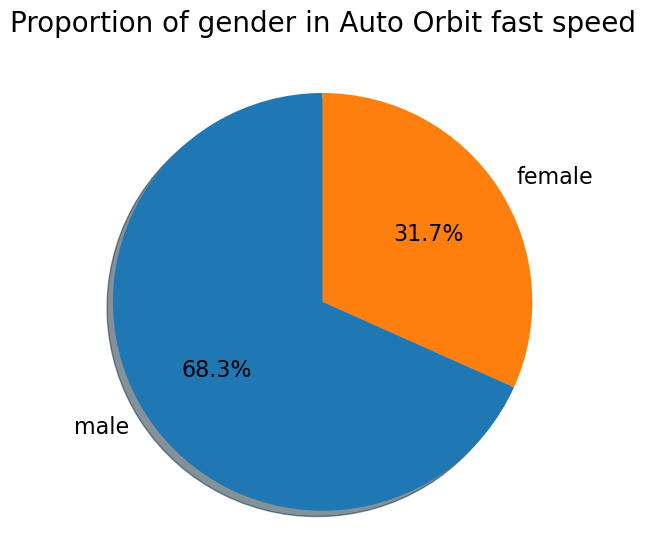

In [9]:
#Gender
print('Gender')
print('Fast')
labels = unique([a for ll in Gender for a in ll])
sizes = [Gender[0].count(c) for c in labels]
print('Gender\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of gender in Auto Orbit fast speed\n',fontsize=20)
plt.show()

Ethnicity
Fast
Ethnicity	Count
white	31
black	6
Hispanic	1
asian	3


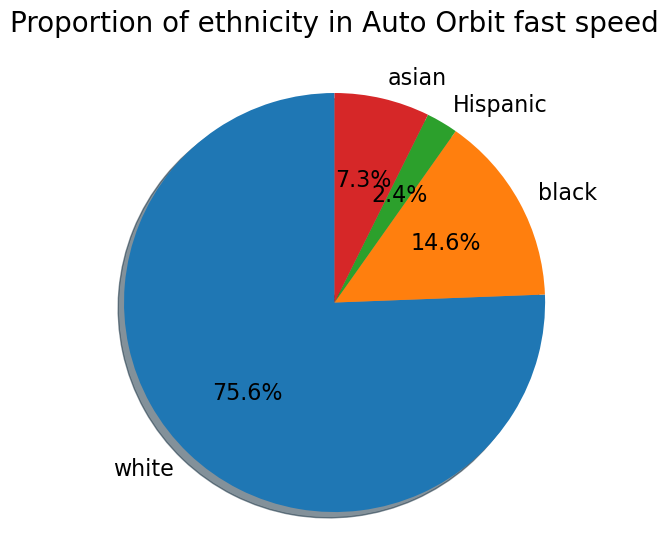

In [10]:
#Ethnicity
print('Ethnicity')
print('Fast')
labels = unique([a for ll in Ethnicity for a in ll])
sizes = [Ethnicity[0].count(c) for c in labels]
print('Ethnicity\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of ethnicity in Auto Orbit fast speed\n',fontsize=20)
plt.show()

Handedness
Fast
Handedness	Count
right	40
left	1


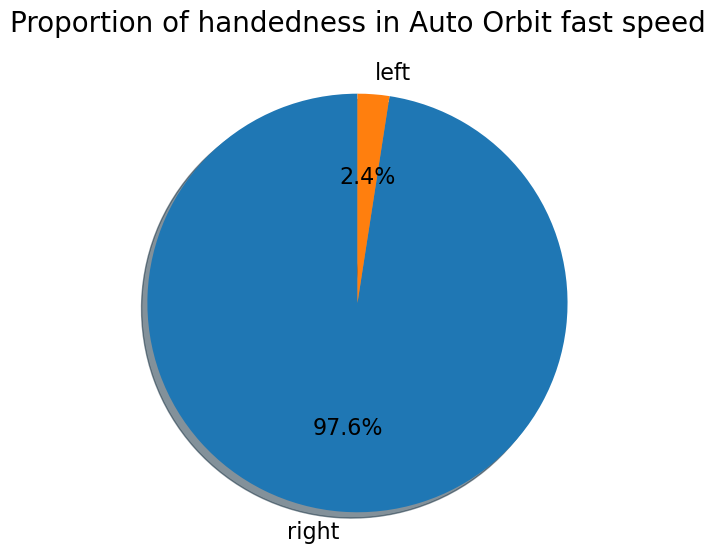

In [11]:
#Handedness
print('Handedness')
print('Fast')
labels = unique([a for ll in Handedness for a in ll])
sizes = [Handedness[0].count(c) for c in labels]
print('Handedness\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of handedness in Auto Orbit fast speed\n',fontsize=20)
plt.show()

In [12]:
#Gaming
print('Gaming')
print('Fast')
hand_f = np.array(Gaming[0])
print(np.mean(hand_f))
print(np.std(hand_f))

Gaming
Fast
14.268292682926829
8.979718041757138


In [13]:
#Hours of gaming per week
print('Hours per week')
print('Fast')
hours_f = np.array(HoursWeek[0])
print(np.mean(hours_f))
print(np.std(hours_f))

Hours per week
Fast
12.24390243902439
10.580194308245854


In [14]:
#Bonus money across subjects
print('Bonus money')
print('Fast')
bonus_f = np.array(Bonus[0])
print(np.mean(bonus_f))
print(np.std(bonus_f))

Bonus money
Fast
388.2439024390244
212.67205722951567


# Fast subjects - Strategy comparison

In [15]:
##### Load prepared Excel data file with scores
Streamed_names=[]
Streamed_scores = []
SeqFile = '../Inputs/Humans_Part_II/Streamed/Streamed_Summary_Scores_FFF.txt'
f_toOpen = open(SeqFile,"r") 
lines = [line.rstrip().split("\t") for line in f_toOpen]
cats = lines[0]
print(cats)
#print(lines[1])
idx=0
for ii in np.arange(1,len(lines)):
    cur_line=lines[ii]
    Streamed_names.append(cur_line[0])
    these_scores = [float(cur_line[ii]) for ii in np.arange(3,18)]
    Streamed_scores.append(np.mean(np.array(these_scores)))
    idx=idx+1
print(Streamed_names)
print(Streamed_scores)

['Participant', 'condition1', 'condition2', 'Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5', 'Game 6', 'Game 7', 'Game 8', 'Game 9', 'Game 10', 'Game 11', 'Game 12', 'Game 13', 'Game 14', 'Game 15']
['A13G6IRFQBEE8K', 'A19X8IA9EKC3XH', 'AAE1COF4E8740', 'A122LRCSBAD6DC', 'A1RH69F7I73LRW', 'A1SISJL5ST2PWH', 'A1U2A42K8FV3RA', 'AFM65NU0UXIGP', 'ACGHHDT7RY1AH']
[2284.0, 2502.4, 2352.5333333333333, 2067.6, 2227.733333333333, 2344.6666666666665, 1631.6, 2098.266666666667, 1810.9333333333334]


In [16]:
#### Load coupled names & scores
Coupled_names=[]
Coupled_scores = []
SeqFile = '../Inputs/Humans_Part_II/Coupled/Coupled_Summary_Scores_FFF.txt'
f_toOpen = open(SeqFile,"r") 
lines = [line.rstrip().split("\t") for line in f_toOpen]
cats = lines[0]
print(cats)
#print(lines[1])
idx=0
for ii in np.arange(1,len(lines)):
    cur_line=lines[ii]
    Coupled_names.append(cur_line[0])
    these_scores = [float(cur_line[ii]) for ii in np.arange(3,18)]
    Coupled_scores.append(np.mean(np.array(these_scores)))
    idx=idx+1
print(len(Coupled_names))
print(Coupled_names)
print(Coupled_scores)

['Participant', 'condition1', 'condition2', 'Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5', 'Game 6', 'Game 7', 'Game 8', 'Game 9', 'Game 10', 'Game 11', 'Game 12', 'Game 13', 'Game 14', 'Game 15']
32
['A11LNK1U3DT08V', 'A13B8594JIUFDF', 'A1DHJE69R494AH', 'A1FG2G0J8M9Q0N', 'A1U6L1L2CUQNU5', 'A25W2106F90G7L', 'A2DMUU9GE8QA5Q', 'A2FM6APZP3FN22', 'A2PW5825FIRONK', 'A376AZWIBALRC', 'A38V6MB0UIXY0N', 'A3D1QQ8BEO75C6', 'A3H2KP0VBENV3N', 'A3LNWWZ7HGAGGM', 'A3Q4Y5ONYPSQGF', 'A7OZPNXIVO1FX', 'AJZYNIL3ITOK0', 'AUPXYEKITX8UT', 'AY4PZPXHSRCP5', 'A1EP3XESXAG0EP', 'A2RY4MK1FONYH1', 'A2W8TJXW68442D', 'AY5OS6NZWVX22', 'A1RV2LERVS0A4H', 'A2BFFKEYMCBFWW', 'A3LA0JBSIW4MUI', 'A13YOOKZFZJJ10', 'A3IGG3RX4HXUV9', 'AQXRHIMQ7UK7O', 'ASZBND3G5UYJG', 'AXMPSUNKUBEIL', 'AZ8NBOTCBCLKG']
[1637.6, 1327.4666666666667, 692.9333333333333, 709.3333333333334, 1197.3333333333333, 778.9333333333333, 674.9333333333333, 494.4, 127.6, 500.4, 1007.6, 877.0666666666667, 2202.5333333333333, 2265.4666666666667, 607.7333333333333

In [17]:
#### Load excluded names & scores

Excluded_names = []
Excluded_scores = []
SeqFile = '../Demographics/Excluded_Scores.txt'
f_toOpen = open(SeqFile,"r") 
lines = [line.rstrip().split("\t") for line in f_toOpen]
cats = lines[0]
print(cats)
#print(lines[1])
idx=0
for ii in np.arange(1,len(lines)):
    cur_line=lines[ii]
    Excluded_names.append(cur_line[0])
    these_scores = [float(cur_line[ii]) for ii in np.arange(4,19)]
    Excluded_scores.append(np.mean(np.array(these_scores)))
    idx=idx+1
print(len(Excluded_names))
print(Excluded_names)
print(Excluded_scores)

['Participant', 'condition', 'Game Type', 'Avg Points', 'Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5', 'Game 6', 'Game 7', 'Game 8', 'Game 9', 'Game 10', 'Game 11', 'Game 12', 'Game 13', 'Game 14', 'Game 15']
45
['A11FRUGBC2C0VT', 'A1AQJ9W3U9PK7I', 'A1B936OJOU8573', 'A1BL99ZVNZGA2G', 'A1CI99XLM06I1I', 'A1E9D1OT9VJYDZ', 'A1K113CD8JEHC7', 'A1MSG3V72SBKVU', 'A1RKNDO2JE532F', 'A1RUKAQH2YAA60', 'A1SJROP154XJCN', 'A1UM0BE0RD8NAO', 'A22A0Y1H9IJQKI', 'A23MLPQL9FA74O', 'A267B1OB4VKKAW', 'A27161SRMQ0I13', 'A282K2NYSUW4UP', 'A2B5YS0J4C0OBJ', 'A2HW1TJJP1J6RT', 'A2LNC57LLU9HJ2', 'A2S4CVETZQ2H4F', 'A2URK0A8PWVIRD', 'A2XDWB9NVYI3LQ', 'A347RDI3HZOUCY', 'A36J0P94BTS6C1', 'A399XSB2DP0CY6', 'A3BXTV2SXXU1MJ', 'A3C3O5G008FUTH', 'A3JK263LCXWP6R', 'A3M8POKV9BBRDR', 'A3N34TT9VBG9E1', 'A3UXQ4VQZ312FI', 'A3VW5PI9ZX9DOD', 'A4423YB0SNYI5', 'A4LTI1X16OFE8', 'A7MHCKF3TT0O3', 'A97JSQCEPTLJ0', 'AFO7Q4FD7E8FN', 'AJABAPM32ETMN', 'APQPSP0HBJZ0H', 'ARR9GKAG3JFE5', 'ASTNA82SIVYUQ', 'AF5TV79945182', 'A2BVVFXMQU8AC7', 'A

In [18]:
#Score comparison

s_scores = np.array(Streamed_scores)
c_scores = np.array(Coupled_scores)
e_scores = np.array(Excluded_scores)

print("Streamed")
print(np.mean(s_scores))
print(np.std(s_scores)/np.sqrt(np.size(s_scores)))
print("Coupled")
print(np.mean(c_scores))
print(np.std(c_scores)/np.sqrt(np.size(c_scores)))
print("Excluded")
print(np.mean(e_scores))
print(np.std(e_scores)/np.sqrt(np.size(e_scores)))

Streamed
2146.637037037037
87.50084090435742
Coupled
1006.3791666666667
100.9700400953337
Excluded
4.53925925925926
2.2643743647036154


In [19]:
#T-test comparisons
print("streamed & coupled")
print(stats.ttest_ind(s_scores, c_scores))
print("streamed & excluded")
print(stats.ttest_ind(s_scores, e_scores))
print("coupled & excluded")
print(stats.ttest_ind(c_scores, e_scores))

streamed & coupled
Ttest_indResult(statistic=5.675003588715947, pvalue=1.4642272796740295e-06)
streamed & excluded
Ttest_indResult(statistic=53.273525421678436, pvalue=4.765640763781173e-47)
coupled & excluded
Ttest_indResult(statistic=11.606638929327197, pvalue=2.040544480490514e-18)


In [20]:
### Load excluded subject demographics
GameNb=15
SubjNb = 45
avgs=np.zeros(SubjNb)
Input_Folder = '../Demographics/'
SeqFile = Input_Folder+'Demographics_Excluded_Fast_Subjects.txt'
f_toOpen = open(SeqFile,"r") 
ex_lines = [line.rstrip().split("\t") for line in f_toOpen]
cats = ex_lines[0]
print(cats)
print(ex_lines[1])

#Initialization of variables
ex_names = []
ex_Age = []
ex_Gaming = []
ex_HoursWeek = []

['Participant', 'Age', 'Gender', 'Ethnicity', 'DominantHand', 'PlayedVideoGames', 'CurrentlyPlay', 'ControllerHand', 'howLong', 'Platform', 'hoursPerWeek', 'flightsim', '2dAction', '3dPlatform', '3dShooter', 'racing', 'sports', 'Relationship', 'Heard']
['A11FRUGBC2C0VT', '32', 'male', 'white', 'right', 'yes', 'yes', 'both', '11', 'mobile', '1', '2', '2', '1', '1', '2', '1', '"social,challenge,competitive"', 'no']


In [21]:
for ii in np.arange(1,len(ex_lines)):
    cur_line=ex_lines[ii]
    if(len(cur_line)>1):
        ex_names.append(cur_line[0])
        ex_Age.append(int(cur_line[1]))
        if(not(cur_line[8]=='')):
            ex_Gaming.append(float(cur_line[8]))
        if(not(cur_line[10]=='')):
            ex_HoursWeek.append(float(cur_line[10]))
            
ex_Age = np.array(ex_Age)
ex_Gaming = np.array(ex_Gaming)
ex_HoursWeek = np.array(ex_HoursWeek)

In [22]:
c_Age = []
s_Age = []
c_Gaming = []
s_Gaming = []
c_HoursWeek = []
s_HoursWeek = []

for ii,name in enumerate(names[0]): #look in names "fast" only
    if(name in Streamed_names): #Name identified as being "streamed"
        s_Age.append(Age[0][ii])
        s_Gaming.append(Gaming[0][ii])
        s_HoursWeek.append(HoursWeek[0][ii])
    else:
        c_Age.append(Age[0][ii])
        c_Gaming.append(Gaming[0][ii])
        c_HoursWeek.append(HoursWeek[0][ii])
        
c_Age = np.array(c_Age)
s_Age = np.array(s_Age)
c_Gaming = np.array(c_Gaming)
s_Gaming = np.array(s_Gaming)
c_HoursWeek = np.array(c_HoursWeek)
s_HoursWeek = np.array(s_HoursWeek)

In [23]:
#Stats Age

print("Streamed")
print(np.mean(s_Age))
print(np.std(s_Age)/np.sqrt(np.size(s_Age)))
print("Coupled")
print(np.mean(c_Age))
print(np.std(c_Age)/np.sqrt(np.size(c_Age)))
print("Excluded")
print(np.mean(ex_Age))
print(np.std(ex_Age)/np.sqrt(np.size(ex_Age)))

#T-test comparisons
print("streamed & coupled")
print(stats.ttest_ind(s_Age, c_Age))
print("streamed & excluded")
print(stats.ttest_ind(s_Age, ex_Age))
print("coupled & excluded")
print(stats.ttest_ind(c_Age, ex_Age))

Streamed
29.666666666666668
1.5396007178390019
Coupled
34.84375
1.206354735576097
Excluded
35.84444444444444
1.2352659754799071
streamed & coupled
Ttest_indResult(statistic=-2.089202515476093, pvalue=0.043262624056471785)
streamed & excluded
Ttest_indResult(statistic=-2.1296153993212203, pvalue=0.03795658247395749)
coupled & excluded
Ttest_indResult(statistic=-0.5537695963677157, pvalue=0.5813838178376283)


In [24]:
#Stats Gaming

print("Streamed")
print(np.mean(s_Gaming))
print(np.std(s_Gaming)/np.sqrt(np.size(s_Gaming)))
print("Coupled")
print(np.mean(c_Gaming))
print(np.std(c_Gaming)/np.sqrt(np.size(c_Gaming)))
print("Excluded")
print(np.mean(ex_Gaming))
print(np.std(ex_Gaming)/np.sqrt(np.size(ex_Gaming)))

#T-test comparisons
print("streamed & coupled")
print(stats.ttest_ind(s_Gaming, c_Gaming))
print("streamed & excluded")
print(stats.ttest_ind(s_Gaming, ex_Gaming))
print("coupled & excluded")
print(stats.ttest_ind(c_Gaming, ex_Gaming))

Streamed
21.22222222222222
1.986235211524729
Coupled
12.3125
1.5401130614949994
Excluded
10.409090909090908
0.9644069505873011
streamed & coupled
Ttest_indResult(statistic=2.812926595653091, pvalue=0.007648924706012862)
streamed & excluded
Ttest_indResult(statistic=4.584148056200006, pvalue=2.980276558751252e-05)
coupled & excluded
Ttest_indResult(statistic=1.0836709522546546, pvalue=0.28202896672606276)


In [25]:
#Stats Hours per week

print("Streamed")
print(np.mean(s_HoursWeek))
print(np.std(s_HoursWeek)/np.sqrt(np.size(s_HoursWeek)))
print("Coupled")
print(np.mean(c_HoursWeek))
print(np.std(c_HoursWeek)/np.sqrt(np.size(c_HoursWeek)))
print("Excluded")
print(np.mean(ex_HoursWeek))
print(np.std(ex_HoursWeek)/np.sqrt(np.size(ex_HoursWeek)))

#T-test comparisons
print("streamed & coupled")
print(stats.ttest_ind(s_HoursWeek, c_HoursWeek))
print("streamed & excluded")
print(stats.ttest_ind(s_HoursWeek, ex_HoursWeek))
print("coupled & excluded")
print(stats.ttest_ind(c_HoursWeek, ex_HoursWeek))

Streamed
14.333333333333334
3.5381518506868126
Coupled
11.65625
1.8554235191855455
Excluded
10.522727272727273
1.4765692857931045
streamed & coupled
Ttest_indResult(statistic=0.657669881001098, pvalue=0.5146135250426445)
streamed & excluded
Ttest_indResult(statistic=1.0280906270778605, pvalue=0.3087586597805266)
coupled & excluded
Ttest_indResult(statistic=0.4768660253053532, pvalue=0.6348627687937647)


# Feedback comparison across strategies

In [26]:
##### Load included subjects data
Input_Folder = '../Demographics/'
SeqFile = Input_Folder+'Feedback_Fast_Subjects_Included.txt'
f_toOpen = open(SeqFile,"r") 
lines_included = [line.rstrip().split("\t") for line in f_toOpen]
cats = lines_included[0]
print(cats)
print(lines_included[1])
print(len(cats))

['Participant', 'Condition', 'Play Music?', 'Play Sports?', 'Played Before']
['A11LNK1U3DT08V', 'fast-fast-fast', 'no', 'no', 'no']
5


In [27]:
Music = [[],[],[]] #streamed, coupled, excluded
Sports = [[],[],[]]

for ii,cur_line in enumerate(lines_included[1:]): 
    this_name = cur_line[0]
    if(not(len(cur_line)<=1)):
        if(this_name in Streamed_names): 
            Music[0].append(cur_line[2])
            Sports[0].append(cur_line[3])
        else:
            Music[1].append(cur_line[2])
            Sports[1].append(cur_line[3])

In [28]:
##### Load excluded subjects data
Input_Folder = '../Demographics/'
SeqFile = Input_Folder+'Feedback_Fast_Subjects_Excluded.txt'
f_toOpen = open(SeqFile,"r") 
lines_excluded = [line.rstrip().split("\t") for line in f_toOpen]
cats = lines_excluded[0]
print(cats)
print(lines_excluded[1])

for ii,cur_line in enumerate(lines_excluded[1:]):
    if(not(len(cur_line)<=1)):
        Music[2].append(cur_line[2])
        Sports[2].append(cur_line[3])

['Participant', 'Condition', 'Play Music?', 'Play Sports?', 'Played Before']
['A11FRUGBC2C0VT', 'fast-fast-fast', 'no', 'no', 'no']


Music
Streamed
Music	Count
no	8
yes	1


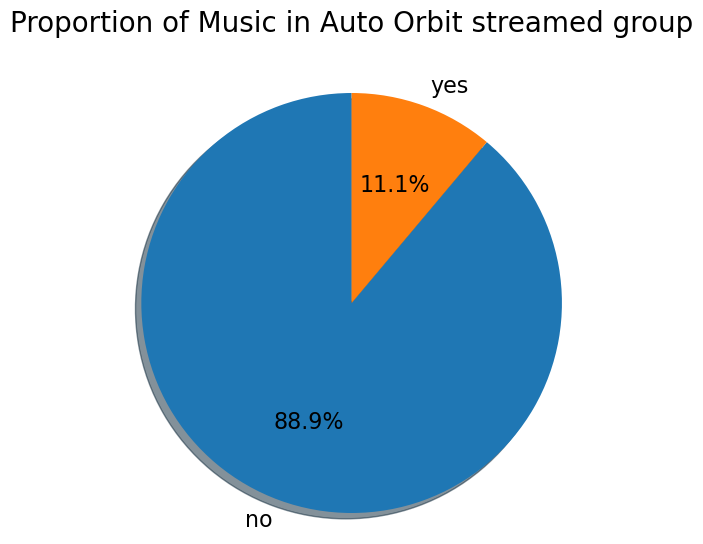

Coupled
Music	Count
no	29
yes	3


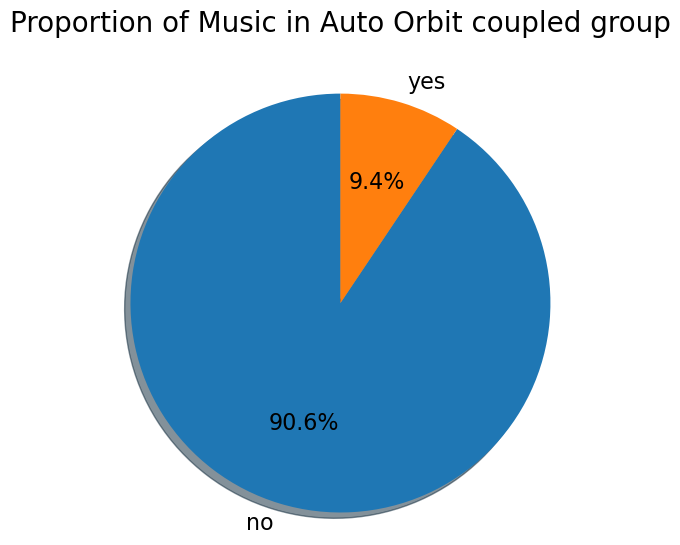

Excluded
Music	Count
no	42
yes	3


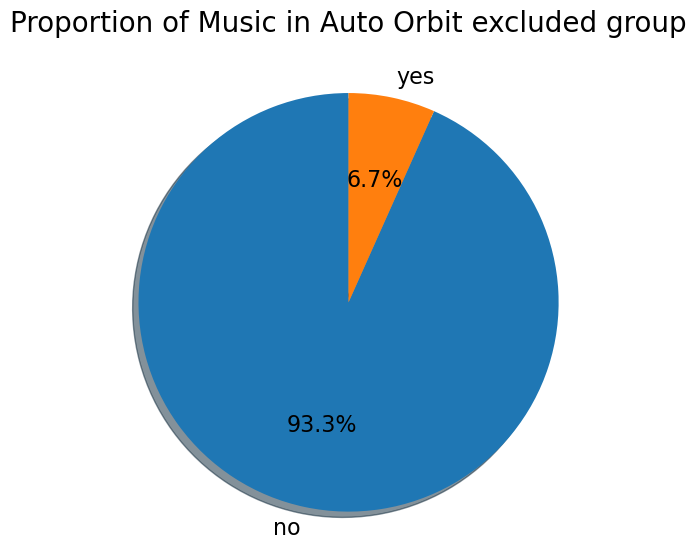

In [29]:
#Music
print('Music')
print('Streamed')
labels = unique([a for ll in Music for a in ll])
sizes = [Music[0].count(c) for c in labels]
print('Music\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Music in Auto Orbit streamed group\n',fontsize=20)
plt.show()


print('Coupled')
sizes = [Music[1].count(c) for c in labels]
print('Music\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Music in Auto Orbit coupled group\n',fontsize=20)
plt.show()


print('Excluded')
sizes = [Music[2].count(c) for c in labels]
print('Music\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Music in Auto Orbit excluded group\n',fontsize=20)
plt.show()

Sports
Streamed
Sports	Count
no	9
yes	0


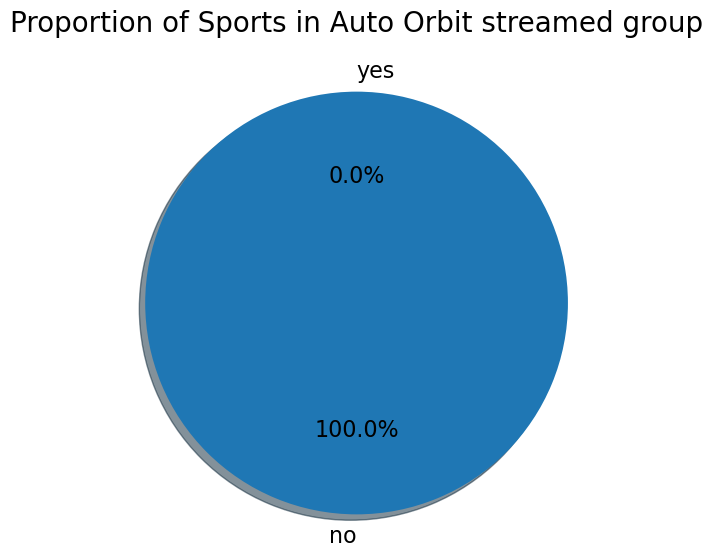

Coupled
Sports	Count
no	20
yes	12


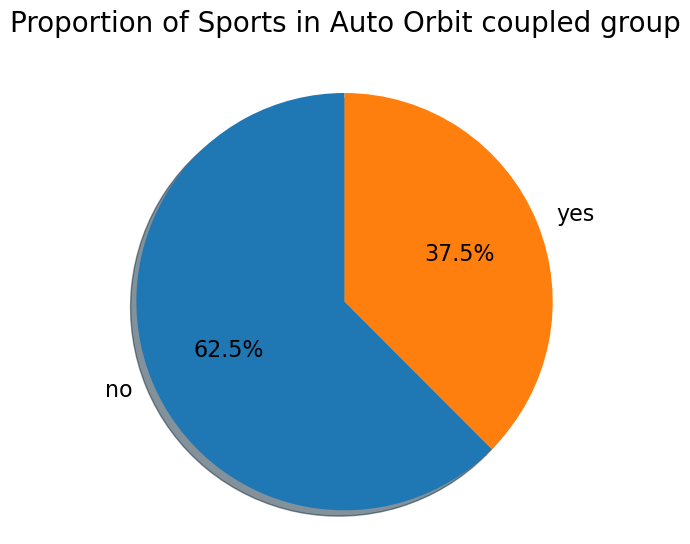

Excluded
Sports	Count
no	37
yes	8


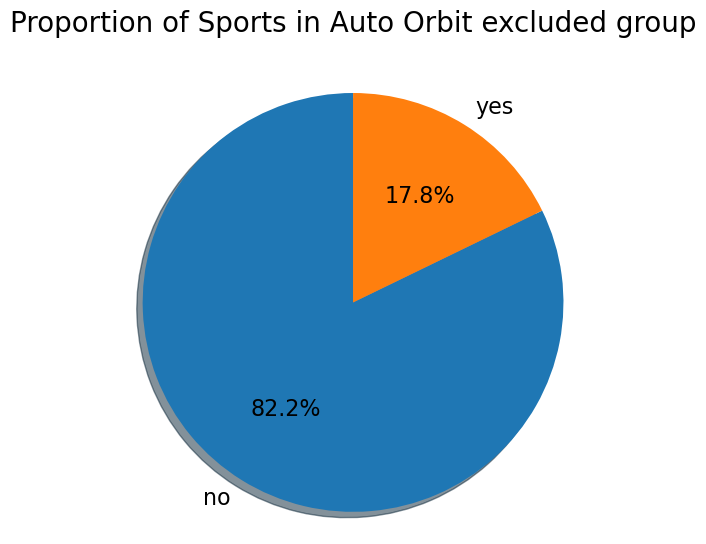

In [30]:
#Sports
print('Sports')
print('Streamed')
labels = unique([a for ll in Sports for a in ll])
sizes = [Sports[0].count(c) for c in labels]
print('Sports\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Sports in Auto Orbit streamed group\n',fontsize=20)
plt.show()


print('Coupled')
sizes = [Sports[1].count(c) for c in labels]
print('Sports\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Sports in Auto Orbit coupled group\n',fontsize=20)
plt.show()


print('Excluded')
sizes = [Sports[2].count(c) for c in labels]
print('Sports\tCount')
for ii in range(len(labels)):
    ToPrint = labels[ii]+'\t'+str(sizes[ii])
    print(ToPrint)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Sports in Auto Orbit excluded group\n',fontsize=20)
plt.show()